# Task 1

Compute and plot the first and second derivative of the above one-dimensional functions using your method of choice in the value range from -4 to 4 using an appropriate grid spacing.

# Task 2

Compute and plot the partial first derivatives of the above two-dimensional functions using autograd in the value range from -4 to 4 using an appropriate grid spacing. 

# Task 3
Construct and plot the second derivative of function1, $d^2f_1/dx^2$, through the Laplacian matrix in the value range from -4 to 4 using an appropriate grid spacing.

In [25]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm

from autograd.numpy import *  # this is a numpy wrapper 
from autograd import grad

from autograd import elementwise_grad as egrad 

import sympy as sp

In [26]:
def function1(x):
    y = x*(x - 3)*(x + 3)
    return y

def function2(x):
    y = abs(x)
    return y

def function3(x):
    y = sin(x * 2.1) * (-x / 2.0)
    return y

def function4(x):
    y = 1.6**x - 1.5 * x
    return y

def function5(x,y):
    z = sin(x + y) * tan(0.1 * x)
    return z

def function6(x,y):
    z = sin(sqrt(5) + x) * y
    return z

In [36]:
a=-4
b=4
npoints = 101
num,dx = linspace(a, b, npoints, retstep=True)
mf=14

## Task 1

Compute and plot the first and second derivative of the above one-dimensional functions using your method of choice in the value range from -4 to 4 using an appropriate grid spacing.

In [4]:
class deriv:
    def __init__(self, fval):
        self.dx=dx
        self.fv=fval

    def firstderiv(self):
        dydx_diff = diff(self.fv)/self.dx
        #dydx_grad_e2 = gradient(self.fv, self.dx, edge_order=2)

        # put the diff points between original points
        num2 = num + dx/2
        return dydx_diff, num, num2#, dydx_grad_e2
    
    def secondderiv(self):
        d2ydx2_diff = diff(self.fv,n=2)/self.dx**2
        num3 = num2 + dx/2
        
        return d2ydx2_diff, num3

    def plotfunc(self, dydx_diff, num, num2, funcname):#, dydx_grad_e2):
        mf=18
        fig, ax = plt.subplots(figsize=(8,5))

        plt.plot(num, self.fv, label=funcname)
        plt.plot(num2[0:-1], dydx_diff, label='diff')
        plt.plot(num3[0:-2],d2ydx2_diff,label='diff2')#, marker="o")

        #plt.plot(num, dydx_grad_e2, label='gradient,eorder=2')

        plt.xticks(fontsize=mf)
        plt.yticks(fontsize=mf)
        ax.set_xlabel('x value',fontsize=mf)
        ax.set_ylabel('y value',fontsize=mf)
        legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1,
                           labelspacing = 0, handlelength = 0.8)
        plt.show()

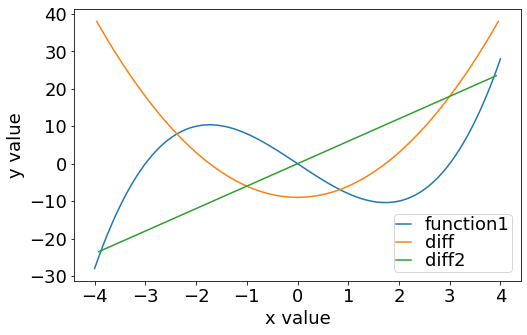

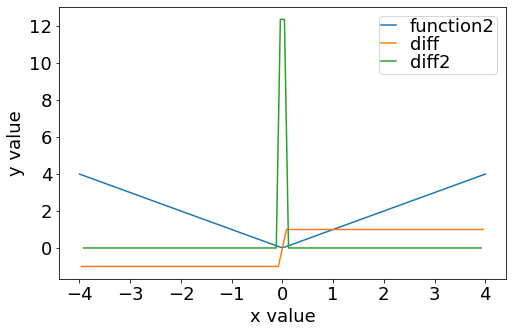

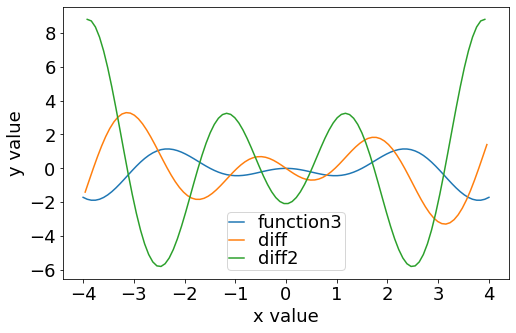

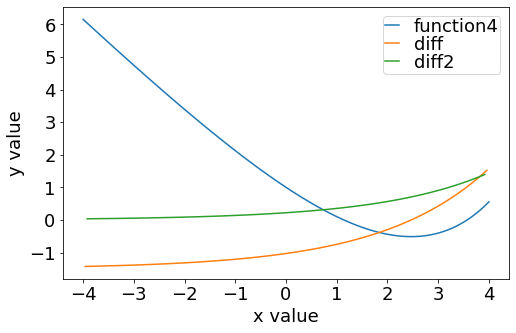

In [5]:
f=[function1(num), function2(num), function3(num), function4(num)]
for i, currf in enumerate(f): #currf is current function from list f
    j=i+1
    func='function'+str(j)
    test=deriv(currf)
    dydx_diff, num, num2=test.firstderiv()
    d2ydx2_diff, num3=test.secondderiv()
    
    test.plotfunc(dydx_diff, num, num2, func)#, dydx_grad_e2)

## Task 2

Compute and plot the partial first derivatives of the above two-dimensional functions using autograd in the value range from -4 to 4 using an appropriate grid spacing. 


In [12]:
numx,deltax = linspace(a,b,npoints,retstep=True)
numy,deltay = linspace(a,b,npoints,retstep=True)

#this is the mesh for the plotting
partialx = zeros((len(numx),len(numy))) # df/dx
partialy = zeros((len(numx),len(numy))) # df/dy
fin = zeros((len(numx),len(numy))) # f
            
def plot2D(x,y,z,title):
    mf = 16
    Y, X = meshgrid(y,x)
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, z,cmap = cm.magma, rstride=1, cstride=1,edgecolor='none')
    plt.xticks(fontsize=mf)
    plt.yticks(fontsize=mf)
    ax.zaxis.set_tick_params(labelsize=mf)
    ax.set_xlabel('x value',fontsize=mf)
    ax.set_ylabel('y value',fontsize=mf)
    ax.set_zlabel('z value',fontsize=mf)
    ax.set_title('{}'.format(title),fontsize=mf, weight='bold')
    ax.view_init(30, 80)
    plt.show()

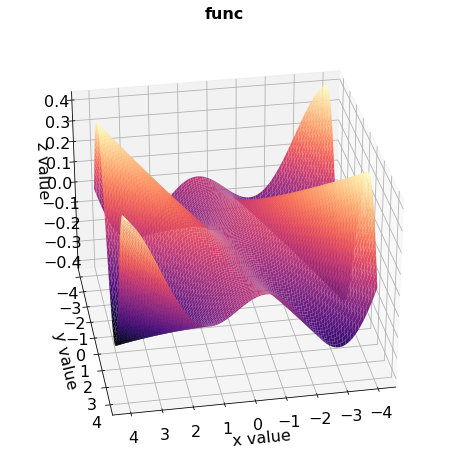

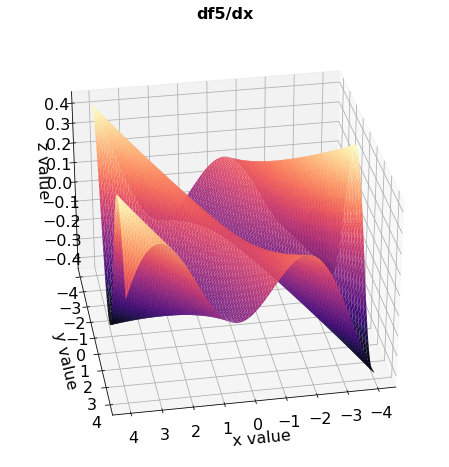

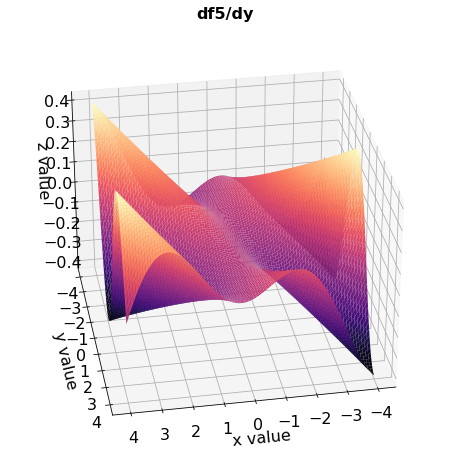

In [19]:
px = grad(function5,0)
py = grad(function5,1)

for j,x in enumerate(numx):
    for k,y in enumerate(numy):
        fin[j,k]=function5(x,y)
        partialx[j,k]=px(x,y)
        partialy[j,k]=py(x,y)
        
plot2D(numx, numy, fin, 'func5')
plot2D(numx,numy,partialx,'df5/dx')
plot2D(numx,numy,partialy,'df5/dy')

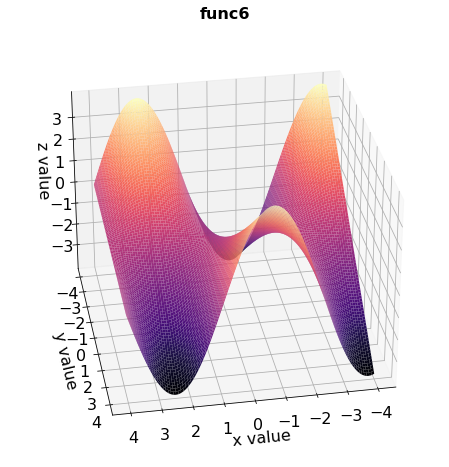

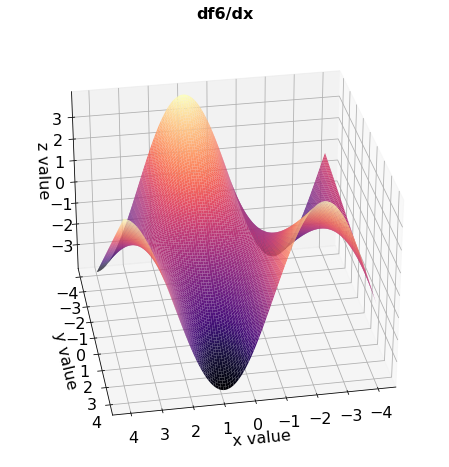

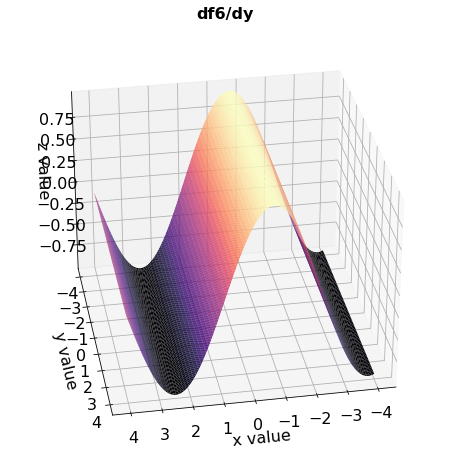

In [20]:
px = grad(function6,0)
py = grad(function6,1)

for j,x in enumerate(numx):
    for k,y in enumerate(numy):
        fin[j,k]=function6(x,y)
        partialx[j,k]=px(x,y)
        partialy[j,k]=py(x,y)

plot2D(numx, numy, fin, 'func6')
plot2D(numx,numy,partialx,'df6/dx')
plot2D(numx,numy,partialy,'df6/dy')

## Task 3
Construct and plot the second derivative of function1, $d^2f_1/dx^2$, through the Laplacian matrix in the value range from -4 to 4 using an appropriate grid spacing.

In [33]:
# exact derivative of the function 1
def d2myfunction1(x):
    y = 3*2*x
    return y

myvals,h=linspace(a,b,nsteps,retstep=True)
Laplacian=(-2.0*diag(ones(nsteps))+diag(ones(nsteps-1),1)+diag(ones(nsteps-1),-1))/(h**2)

inp = function1(myvals)
outp = Laplacian @ inp # dot(Laplacian,inp)

outp = delete(outp,0)
outp = delete(outp,-1)

# compare with exact analytical derivative
d2exact = d2myfunction1(myvals)


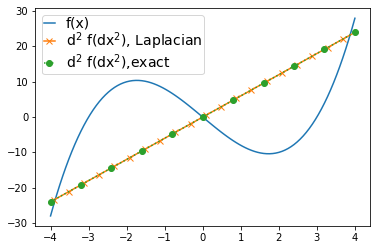

In [37]:
plt.plot(myvals,inp,label='f(x)')
plt.plot(myvals[1:-1],outp,marker='x',markevery=5,label=r'd$^2$ f(dx$^2$), Laplacian')
plt.plot(myvals,d2exact,linestyle = ':',label=r'd$^2$ f(dx$^2$),exact',markevery=10, marker="o")
legend = plt.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)
plt.show()